# Exploration_1
## 1.1 프로젝트 설정
### 1.11 라이브러리 및 모듈 임포트

In [2]:
import tensorflow as tf, tensorflow_datasets as tfds, keras
from keras import layers, models
import models_base, models_top, utils

print(tf.__version__)
print(tfds.__version__)

2025-01-31 16:32:54.189924: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-31 16:32:54.252512: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738308774.282209  125754 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738308774.292264  125754 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-31 16:32:54.352447: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

2.18.0
4.9.7


### 1.12 데이터셋 다운로드 및 확인

I0000 00:00:1738300149.745828   45210 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9571 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_dir='/home/technocracy90/keras/exp_1/data/tf_flowers/3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)


2025-01-31 14:09:10.172038: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-01-31 14:09:10.485033: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


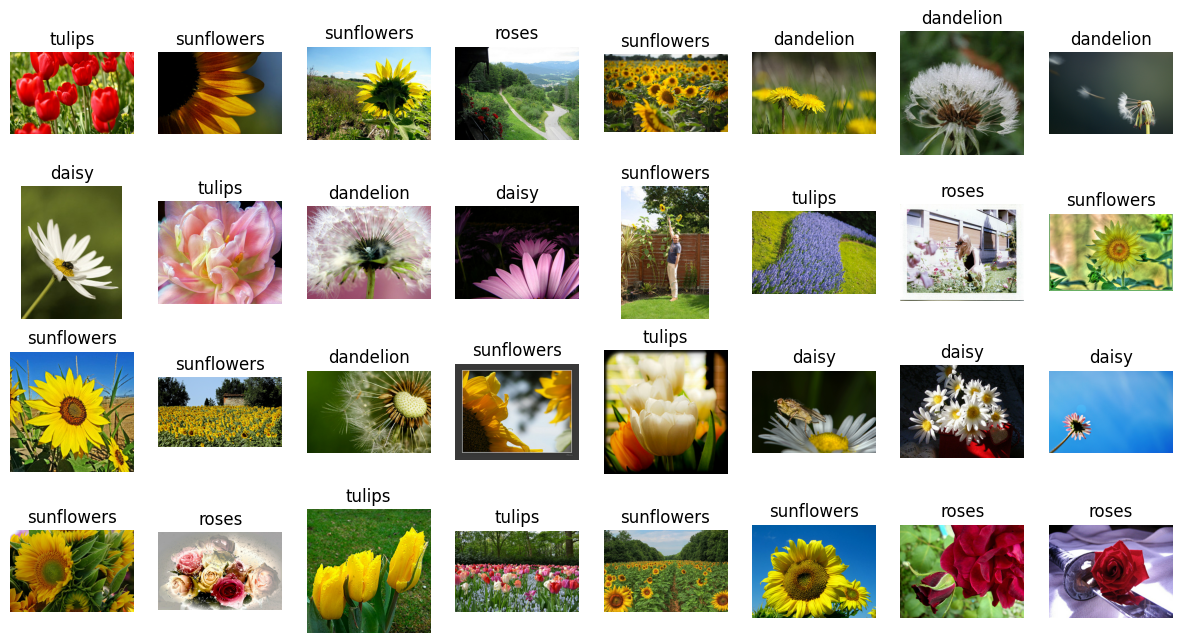

In [2]:
# Load the dataset
(raw_train, raw_validation, raw_test), dataset_info = tfds.load(
    name='tf_flowers',
    shuffle_files=True,
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    data_dir='~/keras/exp_1/data/',
    download=True,
    with_info=True,
    as_supervised=True,
)

# Print the dataset info
print(dataset_info)

# Display the first 32 images
utils.example_display(dataset_info, raw_train, num_examples=32, is_raw = True)

### 1.13 데이터셋 전처리 및 적재

2025-01-31 14:09:11.538197: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


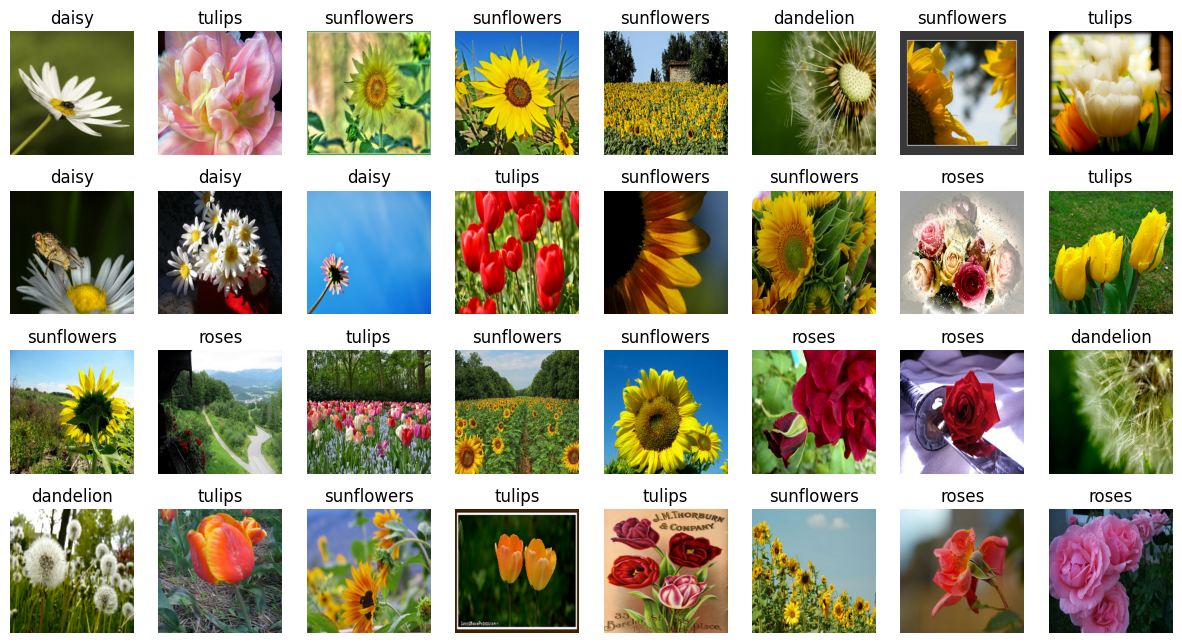

In [3]:
train = raw_train.map(lambda x, y: utils.resize_and_rescale(x, y, size=(224, 224)))
validation = raw_validation.map(lambda x, y: utils.resize_and_rescale(x, y, size=(224, 224)))
test = raw_test.map(lambda x, y: utils.resize_and_rescale(x, y, size=(224, 224)))

utils.example_display(dataset_info, train, num_examples=32, is_raw = False)

train_batch, val_batch, test_batch = utils.get_batches(train, validation, test, batch_size=128)

## 1.2 모델 설정
### 1.21 basic_1 모델

가장 간단한 모델을 설정하기 위해 base 모델을 simple1, top 모델도 simple1으로 설정

#### 1.211 basic_1 모델 설정 및 학습

In [4]:
def basic_model_1(input_shape = (224, 224, 3)):
    inputs = keras.Input(shape=input_shape)
    features = models_base.base_simple1()(inputs)
    features = models_top.simple1()(features)
    output = layers.Dense(5, activation='softmax')(features)
    
    model = keras.Model(inputs=inputs, outputs=output)
    
    return model

basic = basic_model_1()
basic.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ base_simple1 (Sequential)       │ (None, 28, 28, 64)     │        23,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ top_simple1 (Sequential)        │ (None, 256)            │       164,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 189,477 (740.14 KB)

 Trainable params: 189,477 (740.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200


I0000 00:00:1738300153.423406   45344 service.cc:148] XLA service 0x7fb98400c7c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738300153.425764   45344 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2025-01-31 14:09:13.454165: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738300153.533962   45344 cuda_dnn.cc:529] Loaded cuDNN version 90600
2025-01-31 14:09:14.509963: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_536', 4 bytes spill stores, 4 bytes spill loads

2025-01-31 14:09:14.668668: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_184', 360 bytes sp

 4/23 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2251 - loss: 1.6053

I0000 00:00:1738300161.460916   45344 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2683 - loss: 1.5803

2025-01-31 14:09:23.171219: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_184', 168 bytes spill stores, 168 bytes spill loads

2025-01-31 14:09:23.554905: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_857', 56 bytes spill stores, 56 bytes spill loads

2025-01-31 14:09:23.570834: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_184', 176 bytes spill stores, 176 bytes spill loads



23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.2701 - loss: 1.5784

2025-01-31 14:09:30.825396: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_98_0', 768 bytes spill stores, 720 bytes spill loads

2025-01-31 14:09:30.998724: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_98_0', 228 bytes spill stores, 228 bytes spill loads

2025-01-31 14:09:33.007602: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_98_0', 756 bytes spill stores, 444 bytes spill loads

2025-01-31 14:09:33.511036: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_98', 12 bytes spill stores, 12 bytes spill loads

2025-01-31 14:09:33.511980: I external/local_xla/xla/str

23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 618ms/step - accuracy: 0.2718 - loss: 1.5767 - val_accuracy: 0.4360 - val_loss: 1.3695
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.3904 - loss: 1.3752 - val_accuracy: 0.5204 - val_loss: 1.2136
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4698 - loss: 1.2280 - val_accuracy: 0.5504 - val_loss: 1.1640
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4787 - loss: 1.1912 - val_accuracy: 0.5559 - val_loss: 1.1340
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ -1s -71963us/step - accuracy: 0.4851 - loss: 1.1601 - val_accuracy: 0.5395 - val_loss: 1.1140
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.5145 - loss: 1.1419 - val_accuracy: 0.5831 - val_loss: 1.0793
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5221 - loss: 1.1188 - val_accuracy: 0.5913 - val_loss: 1.0571
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5455 - loss: 1.0927 - val_accuracy: 0.6049 

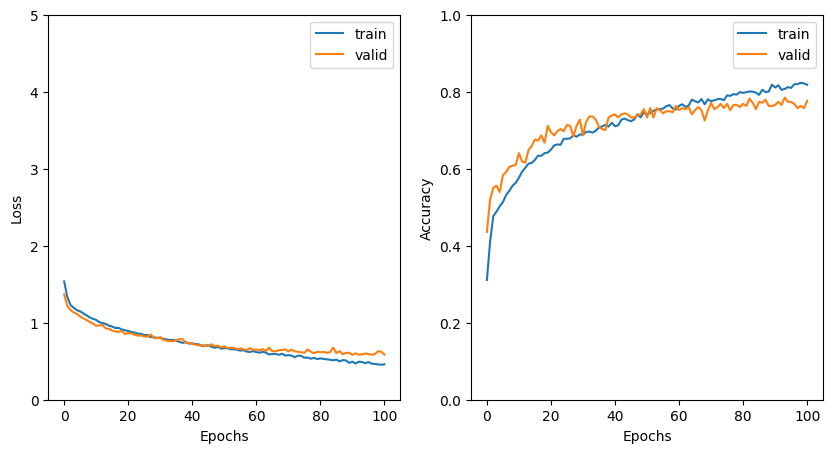

In [5]:
basic.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

basic_history = basic.fit(train_batch,
                          validation_data=val_batch,
                          epochs=200,
                          callbacks=utils.callback_earlystop(10),
                          )

utils.plot_history(basic_history)

#### 1.212 basic_1 모델 리뷰

1. train accuracy가 느리게 상승함: 모델 크기를 키울 필요성 있음
2. train accuracy가 충분히 커지기 전에 val loss가 과적합에 이름

### 1.22 basic_2 모델

모델 크기를 키우기 위해 basic_1 모델의 base 모델을 simple2로 교체

#### 1.221 basic_2 모델 설정 및 학습

In [6]:
def basic_model_2(input_shape = (224, 224, 3)):
    inputs = keras.Input(shape=input_shape)
    features = models_base.base_simple2(input_shape=input_shape)(inputs)
    features = models_top.simple1()(features)
    output = layers.Dense(5, activation='softmax')(features)
    
    model = keras.Model(inputs=inputs, outputs=output)
    
    return model

basic = basic_model_2()
basic.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ base_simple2 (Functional)       │ (None, 7, 7, 256)      │       392,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ top_simple1 (Sequential)        │ (None, 256)            │       262,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 656,805 (2.51 MB)

 Trainable params: 656,805 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200


2025-01-31 14:11:11.187874: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_843_0', 312 bytes spill stores, 268 bytes spill loads



21/23 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2482 - loss: 1.6135

2025-01-31 14:11:15.263791: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_272', 8 bytes spill stores, 8 bytes spill loads

2025-01-31 14:11:15.550709: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_272', 4 bytes spill stores, 4 bytes spill loads

2025-01-31 14:11:15.627063: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_272_0', 168 bytes spill stores, 168 bytes spill loads

2025-01-31 14:11:15.778593: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1007', 52 bytes spill stores, 52 bytes spill loads

2025-01-31 14:11:15.830027: I external/local_xla/xla/stream_exe

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.2525 - loss: 1.6097

2025-01-31 14:11:19.950947: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_123', 8 bytes spill stores, 8 bytes spill loads

2025-01-31 14:11:20.025205: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_123', 4 bytes spill stores, 4 bytes spill loads

2025-01-31 14:11:20.078319: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_123_0', 168 bytes spill stores, 168 bytes spill loads



23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 331ms/step - accuracy: 0.2546 - loss: 1.6079 - val_accuracy: 0.3351 - val_loss: 1.5717
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.4258 - loss: 1.3359 - val_accuracy: 0.3787 - val_loss: 1.3448
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.4692 - loss: 1.2702 - val_accuracy: 0.5422 - val_loss: 1.1565
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.4912 - loss: 1.1992 - val_accuracy: 0.5395 - val_loss: 1.1187
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5168 - loss: 1.1495 - val_accuracy: 0.5341 - val_loss: 1.0704
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5532 - loss: 1.0849 - val_accuracy: 0.6022 - val_loss: 1.0461
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5538 - loss: 1.0626 - val_accuracy: 0.6213 - val_loss: 0.9404
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5829 - loss: 1.0275 - val_accuracy: 0.6104 - val

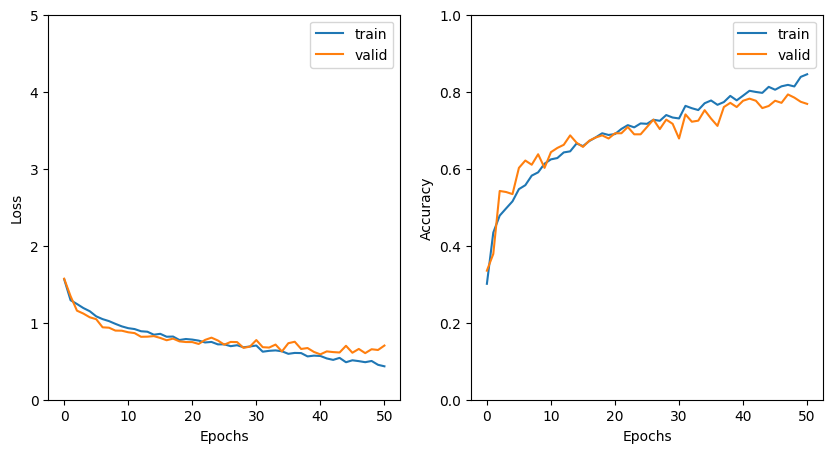

In [7]:
basic.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

basic_history = basic.fit(train_batch,
                          validation_data=val_batch,
                          epochs=200,
                          callbacks=utils.callback_earlystop(10),
                          )

utils.plot_history(basic_history)

#### 1.222 basic_2 모델 리뷰

1. base 모델 확장의 효과 확인: 과대적합이 발생하는 epoch가 절반으로 감소
2. 여전히 train_acc이 충분히 높아지기 전에 과적합 발생

### 1.23 basic_3 모델

1. 모델 크기를 키우기 위해 base 모델을 simple3로 교체

#### 1.231 basic_3 모델 설정 및 학습

In [ ]:
def basic_model_3(input_shape = (224, 224, 3), output_class = 5):
    inputs = keras.Input(shape=input_shape)
    features = models_base.base_simple3(input_shape=input_shape)(inputs)
    features = models_top.simple1()(features)
    output = layers.Dense(output_class, activation='softmax')(features)
    
    model = keras.Model(inputs=inputs, outputs=output)
    
    return model

basic = basic_model_3()
basic.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ base_simple2 (Functional)       │ (None, 7, 7, 256)      │     1,964,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ top_simple1 (Sequential)        │ (None, 256)            │       262,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,229,382 (8.50 MB)

 Trainable params: 2,229,382 (8.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200


2025-01-31 14:12:14.007590: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1176', 8 bytes spill stores, 8 bytes spill loads



23/23 ━━━━━━━━━━━━━━━━━━━━ 35s 906ms/step - accuracy: 0.2232 - loss: 1.8222 - val_accuracy: 0.2425 - val_loss: 1.6094
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.2318 - loss: 1.6173 - val_accuracy: 0.2425 - val_loss: 1.6101
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.2406 - loss: 1.6078 - val_accuracy: 0.2425 - val_loss: 1.6112
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.2616 - loss: 1.6070 - val_accuracy: 0.2425 - val_loss: 1.6071
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.2455 - loss: 1.6240 - val_accuracy: 0.2425 - val_loss: 1.5778
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.2787 - loss: 1.5946 - val_accuracy: 0.3106 - val_loss: 2.0710
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.3227 - loss: 1.5456 - val_accuracy: 0.4360 - val_loss: 1.3372
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3891 - loss: 1.3710 - val_accuracy: 0.3842

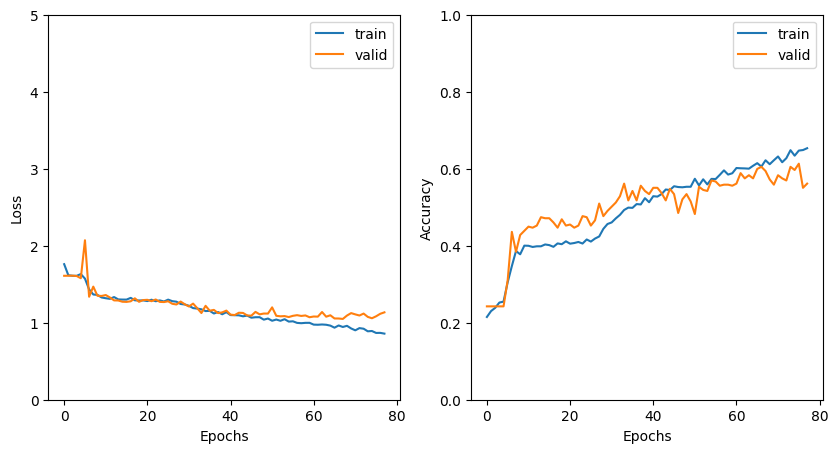

In [9]:
basic.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

basic_history = basic.fit(train_batch,
                          validation_data=val_batch,
                          epochs=200,
                          callbacks=utils.callback_earlystop(10),
                          )

utils.plot_history(basic_history)

#### 1.232 basic_3 모델 리뷰

1. 비정상적인 훈련 history 발생: 훈련 도중 적합에 장애 발생 후 극복
2. 데이터 EDA 필요

#### 1.233 basic_3 모델에 EDA 데이터 적재

민들레 클래스를 민들레 홀씨와 민들레 꽃으로 분리

Found 2965 files belonging to 6 classes.
Using 2372 files for training.
Using 593 files for validation.
Epoch 1/200
18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.1897 - loss: 1.7850

2025-01-31 14:20:17.373503: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_664', 4 bytes spill stores, 4 bytes spill loads

2025-01-31 14:20:17.578837: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_664_0', 168 bytes spill stores, 168 bytes spill loads

2025-01-31 14:20:17.851781: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_664', 8 bytes spill stores, 8 bytes spill loads

2025-01-31 14:20:17.971250: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1578', 64 bytes spill stores, 64 bytes spill loads

2025-01-31 14:20:18.450897: I external/local_xla/xla/stream_exe

19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 906ms/step - accuracy: 0.1900 - loss: 1.7843 - val_accuracy: 0.2070 - val_loss: 1.7569
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.2032 - loss: 1.7529 - val_accuracy: 0.2383 - val_loss: 4.2771
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.2127 - loss: 2.1745 - val_accuracy: 0.2070 - val_loss: 1.7397
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.2020 - loss: 1.7549 - val_accuracy: 0.2070 - val_loss: 1.7465
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ -0s -20938us/step - accuracy: 0.2144 - loss: 1.7478 - val_accuracy: 0.2891 - val_loss: 1.6098
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.3032 - loss: 1.7232 - val_accuracy: 0.2930 - val_loss: 1.5623
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.3256 - loss: 1.5549 - val_accuracy: 0.3398 - val_loss: 1.5821
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.3489 - loss: 1.5277 - val_accuracy: 0

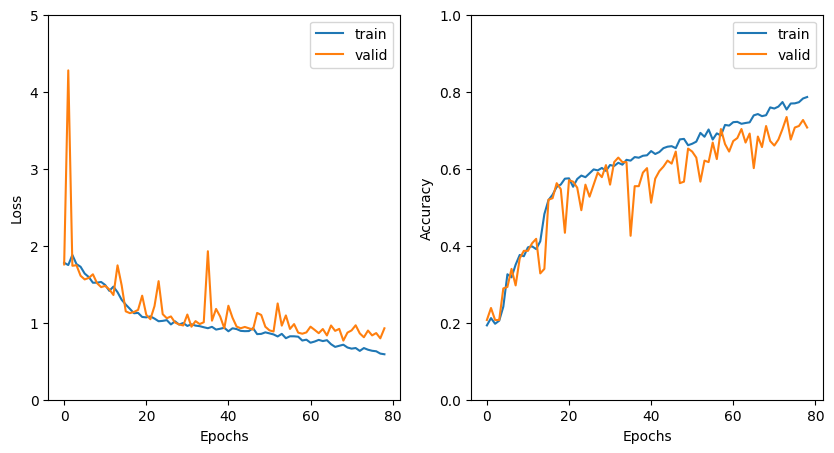

In [17]:
train_ds, val_ds, test_ds = utils.load_datasets_from_directory("data_eda", normalize=True, batch_size=128)

basic = basic_model_3(output_class=6)

basic.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

basic_history = basic.fit(train_ds,
                          validation_data=val_ds,
                          epochs=200,
                          callbacks=utils.callback_earlystop(10),
                          )

utils.plot_history(basic_history)

#### 1.3 EfficientNet V2L 모델 설정 및 학습

1. 

Found 2965 files belonging to 6 classes.
Using 2372 files for training.
Using 593 files for validation.


I0000 00:00:1738308784.924856  125754 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9571 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/200


I0000 00:00:1738308828.825343  128688 service.cc:148] XLA service 0x7f5be4034b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738308828.825518  128688 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2025-01-31 16:33:49.943661: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738308833.616117  128688 cuda_dnn.cc:529] Loaded cuDNN version 90600
2025-01-31 16:34:00.452849: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47046_0', 428 bytes spill stores, 684 bytes spill loads

2025-01-31 16:34:00.518613: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47046', 22

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6999 - loss: 0.7759   

2025-01-31 16:35:43.008401: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8404_0', 428 bytes spill stores, 572 bytes spill loads

2025-01-31 16:35:43.050730: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8404', 220 bytes spill stores, 220 bytes spill loads



38/38 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.7029 - loss: 0.7691 - val_accuracy: 0.8438 - val_loss: 0.4085
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 326ms/step - accuracy: 0.9184 - loss: 0.2400 - val_accuracy: 0.9187 - val_loss: 0.2502
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 391ms/step - accuracy: 0.9371 - loss: 0.1720 - val_accuracy: 0.8625 - val_loss: 0.4886
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - accuracy: 0.9461 - loss: 0.1720 - val_accuracy: 0.8844 - val_loss: 0.3599
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 632ms/step - accuracy: 0.9426 - loss: 0.1501 - val_accuracy: 0.9375 - val_loss: 0.2379
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.9640 - loss: 0.1144 - val_accuracy: 0.9344 - val_loss: 0.2416
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 215ms/step - accuracy: 0.9707 - loss: 0.1015 - val_accuracy: 0.9250 - val_loss: 0.2630
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 215ms/step - accuracy: 0.9640 - loss: 0.1053 - val_accuracy: 0.92

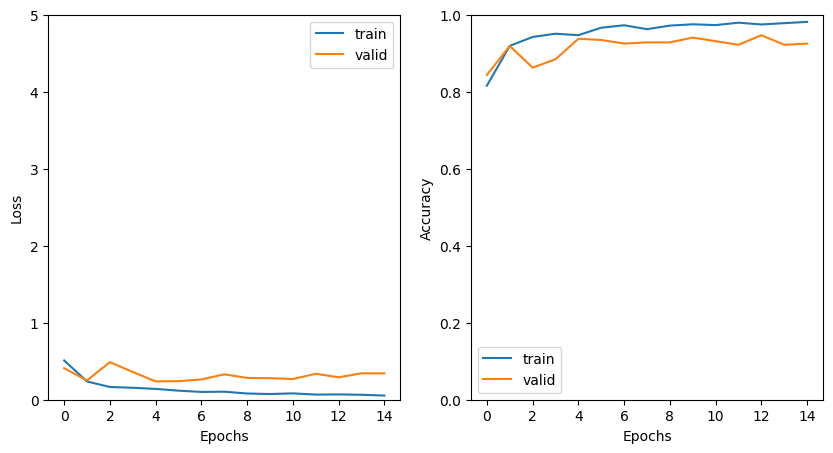

In [3]:
train_ds, val_ds, test_ds = utils.load_datasets_from_directory("data_eda", val_split=0.2, batch_size=64)

def eV2L(input_shape = (224, 224, 3), output_class = 6):
    inputs = keras.Input(shape=input_shape)
    
    features = utils.image_preprocessing_v1()(inputs)
    features = models_base.EV2L(image_shape=input_shape)(inputs)
    features = models_top.simple2()(features)
    output = layers.Dense(output_class, activation='softmax')(features)
    
    model = keras.Model(inputs=inputs, outputs=output)
    
    return model

model = eV2L()

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=200,
                    callbacks=[utils.callback_earlystop(10),
                               utils.callback_savemodel("models/eV2L.keras")],
                    )

utils.plot_history(history)

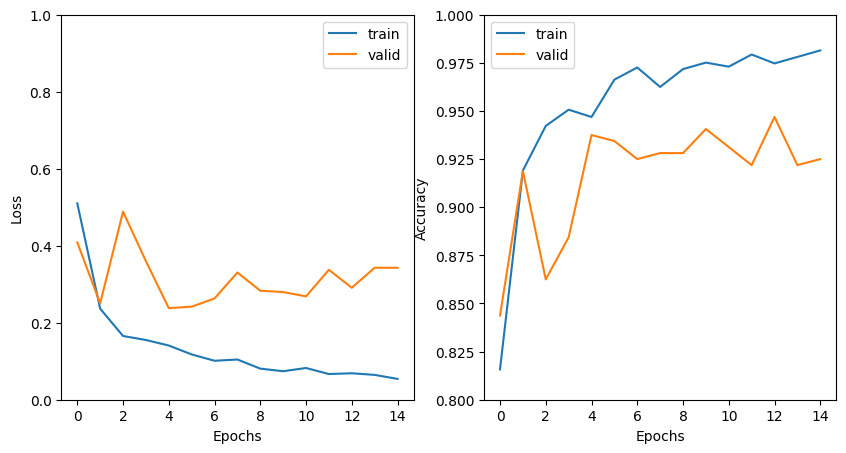

In [5]:
utils.plot_history(history, loss_ylim = (0, 1), acc_ylim = (0.8, 1))